In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/training_results.csv')
display(df)
f = open('D:/Studies/Neuro/Lab 1/norm_params.txt', 'r', newline='\n')
temp = f.read().splitlines()
g_total_min = float(temp[0])
g_total_max = float(temp[1])
kgf_min = float(temp[2])
kgf_max = float(temp[3])
df['Predicted 0'] = df['Predicted 0'] * (g_total_max - g_total_min) + g_total_min
df['Real 0'] = df['Real 0'] * (g_total_max - g_total_min) + g_total_min
df['Predicted 1'] = df['Predicted 1'] * (kgf_max - kgf_min) + kgf_min
df['Real 1'] = df['Real 1'] * (kgf_max - kgf_min) + kgf_min
display(df)

,Epoch,Predicted 0,Real 0,Predicted 1,Real 1
0,1,0.075881,0.841169,0.949151,0.633768
1,1,0.026368,0.367268,0.917382,0.404693
2,1,0.012744,0.446171,0.559557,0.615203
3,1,0.000424,0.361445,0.812333,0.490068
4,1,0.032418,0.293003,0.885399,0.594477
...,...,...,...,...,...
89995,5000,0.379281,0.237083,0.537970,0.646590
89996,5000,0.059161,0.112310,0.710917,0.619459
89997,5000,0.104921,0.115580,0.627482,0.642992
89998,5000,0.299872,0.365989,0.363858,0.362043


,Epoch,Predicted 0,Real 0,Predicted 1,Real 1
0,1,3.400938,9.636916,372.479153,292.240687
1,1,2.997482,5.775318,364.396612,233.960354
2,1,2.886465,6.418262,273.360225,287.517455
3,1,2.786076,5.727869,337.670471,255.681115
4,1,3.046783,5.170167,356.259627,282.244430
...,...,...,...,...,...
89995,5000,5.873206,4.714501,267.868148,295.502809
89996,5000,3.264697,3.697784,311.868623,288.600250
89997,5000,3.637575,3.724430,290.641429,294.587420
89998,5000,5.226139,5.764896,223.571279,223.109514


In [30]:
mse_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]

    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
        general_pred_col += pred_col
        general_real_col += real_col

    mse = np.mean((general_pred_col - general_real_col)**2)
    new_row = {'Epoch': group_name, 'Value': mse}
    mse_data = pd.concat([mse_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mse:.5f}")
display(mse_data)

,Epoch,Value
0,1.0,7225.840534
1,2.0,3844.260998
2,3.0,1583.006218
3,4.0,4040.941842
4,5.0,5564.233999
...,...,...
4995,4996.0,218.970942
4996,4997.0,218.021461
4997,4998.0,217.064107
4998,4999.0,216.100158


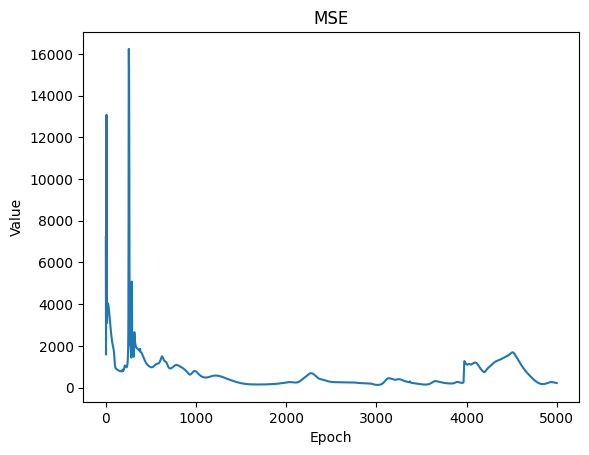

In [31]:
plt.plot(mse_data['Epoch'], mse_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MSE')
plt.show()

In [32]:
mae_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]

    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
        general_pred_col += pred_col
        general_real_col += real_col
    mae = np.mean(abs(general_pred_col - general_real_col))
    new_row = {'Epoch': group_name, 'Value': mae}
    mae_data = pd.concat([mae_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mae:.5f}")
display(mae_data)

,Epoch,Value
0,1.0,75.202588
1,2.0,48.828627
2,3.0,32.582217
3,4.0,47.887327
4,5.0,60.611701
...,...,...
4995,4996.0,11.845275
4996,4997.0,11.827742
4997,4998.0,11.809653
4998,4999.0,11.791050


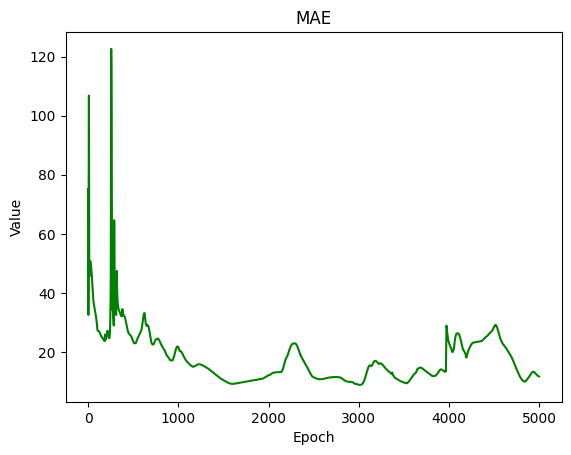

In [33]:
plt.plot(mae_data['Epoch'], mae_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MAE')
plt.show()

In [34]:
def r_squared(y_true, y_pred):
    ssres = np.sum((y_true - y_pred)**2)
    sstot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ssres / sstot)

r_squared_data = pd.DataFrame({'Epoch': [], 'Value': []})
for group_name, group_data in df.groupby('Epoch'):
    general_pred_col = group_data.iloc[:, 1]
    general_real_col = group_data.iloc[:, 2]
    for i in range(3, len(group_data.columns), 2):
        pred_col = group_data.iloc[:, i]
        real_col = group_data.iloc[:, i+1]
    r_squared_value = r_squared(general_real_col, general_pred_col)
    # print(f"Epoch {group_name}: {r_squared_value:.5f}")
    new_row = {'Epoch': group_name, 'Value': r_squared_value}
    r_squared_data = pd.concat([r_squared_data, pd.DataFrame([new_row])], ignore_index=True)
    # print(f"Epoch {group_name}: {mae:.5f}")
display(r_squared_data)

,Epoch,Value
0,1.0,-1.136917
1,2.0,-1.810684
2,3.0,-1.833605
3,4.0,-1.838862
4,5.0,-1.839739
...,...,...
4995,4996.0,0.915956
4996,4997.0,0.916362
4997,4998.0,0.916768
4998,4999.0,0.917174


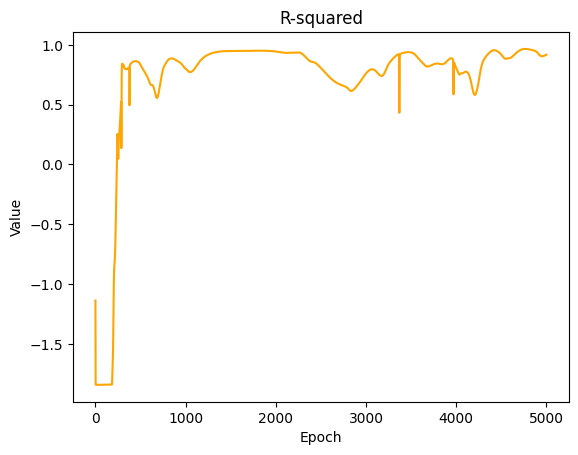

In [35]:
plt.plot(r_squared_data['Epoch'], r_squared_data['Value'], color='orange')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('R-squared')
plt.show()

In [36]:
df2 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/testing_results.csv')
display(df2)

,Number,Predicted 0,Real 0,Predicted 1,Real 1
0,0,0.164877,0.212609,0.606015,0.462984
1,1,0.349682,0.177915,0.584556,1.000000
2,2,0.512093,0.689438,0.724429,0.587862
3,3,0.423916,0.374369,0.526894,0.441148
4,4,0.429926,0.302913,0.407524,0.269746


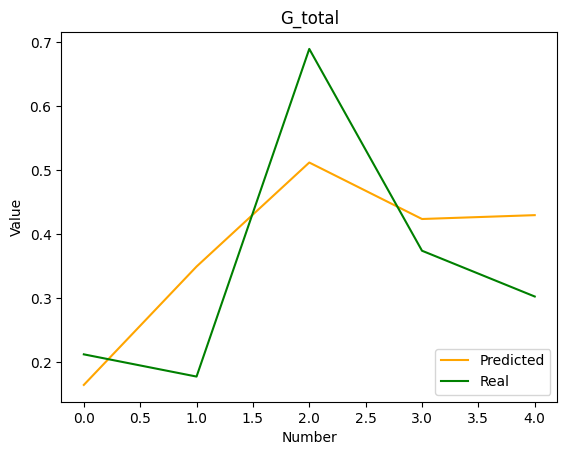

In [37]:
plt.plot(df2['Number'], df2['Predicted 0'], color='orange')
plt.plot(df2['Real 0'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('G_total')
plt.legend(["Predicted", "Real"], loc ="lower right")
plt.show()

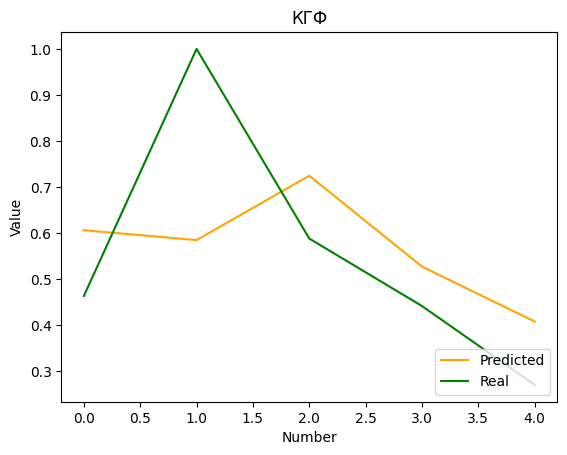

In [38]:
plt.plot(df2['Number'], df2['Predicted 1'], color='orange')
plt.plot(df2['Real 1'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('КГФ')
plt.legend(["Predicted", "Real"], loc ="lower right")
plt.show()